# APS 2 – ANÁLISE DA DIFUSÃO DE UM POLUENTE EM UM RIO COM CORRENTEZA

### Grupo 10 - Matheus Castellucci, Pedro Gomes, João Pedro dos Santos

In [74]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

Esses são os parâmetros que modelam o sistema:

<img src = "imgs/Funcao1.png">

Como trata-se de um sistema de difusão de poluentes no rio, devemos usar a mesma equação para a difusão de calor. 
<img src = "imgs/Funcao2.png">

Esses são os objetivos que devem ser respondidos com a APS: 
<img src = "imgs/Tarefas.png">

## Tarefa 1 (2,0 pontos):
### Substitua as derivadas da equação de Burgers pelas aproximações de diferenças finitas. Use diferença central para as derivadas em X e Y e diferença avançada para a derivada no tempo
![Alt text](imgs/tarefa1_feita.jpeg)

## Tarefa 2:
### (2,0 pontos): Manipule algebricamente a equação obtida no item “a” e encontre a expressão da concentração em um ponto genérico (x, y) no instante futuro t + 1 em função das concentrações no instante atual t
![Alt text](imgs//tarefas2e3_feitas.jpeg)

## Tarefa 3:

In [75]:
#Dados do problema
K = 1 #m²/s
alpha = 1 #m/s
T_despejo = 3 #s
Q_ponto = 100 #kg/ms
Lx = 30 #m
Ly = 20 #m
T_final= 30 #s

#Ponto de solta do poluente
n = 10 #número do grupo
a = n/1.4
b = (60/(n+5))

In [76]:
#Contornos do problema

#Contorno A
#   delta_t/delta_s² < 1/4*K
#   delta_t/delta_s² < 0.25
#delta_x = delta_y = delta_s
delta_s = 1 #m
#divisor = 1.5 #numero necessario para fazer que a condição de contorno seja satisfeita (sempre deixar maior que 1)
#delta_t = (0.25*delta_s**2)/divisor
delta_t = 0.05
# delta_t = (delta_s**2)/4*K
# delta_t = (0.25 * delta_s ** 2) / (4 * K)

In [77]:
def simulacao(K):
    x = int(Lx/delta_s)
    y = int(Ly/delta_s)

    #Informações do ponto de solta
    a_idx = int(a/delta_s)
    b_idx = int(b/delta_s)

    C = np.zeros((y, x))
    tt = int(T_final/delta_t)

    qC_ponto = Q_ponto/(delta_s**2)

    for t in range(tt):
        C2 = C.copy()

        if t <= T_despejo/delta_t:
            C[b_idx][a_idx] += qC_ponto * delta_t


        for i in range(1, x-1):
            for j in range(1, y-1):
                u = alpha
                v = alpha*np.sin(pi* i*delta_s/5)

                termo1 = u*(C[j][i+1] - C[j][i-1])/(2*delta_s)
                termo2 = v*(C[j+1][i] - C[j-1][i])/(2*delta_s)
                termo3 = K*((C[j+1][i] + C[j-1][i] - 4*C[j][i] + C[j][i+1] + C[j][i-1])/delta_s**2)

                C2[j][i] = C[j][i] + delta_t*(-termo1 - termo2 + termo3)

                if C2[j][i] < 0:
                    C2[j][i] = 0

        C2[0][:] = C2[1][:]
        C2[-1][:] = C2[-2][:]
        C2[:][0] = C2[:][1]
        C2[:][-1] = C2[:][-2]

        C = C2.copy()
    
    return C


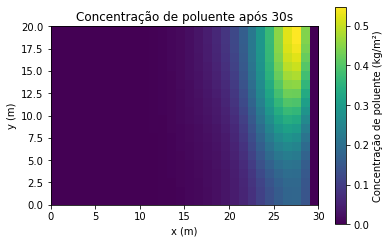

In [78]:
concentracao = simulacao(K)

plt.title("Concentração de poluente após 30s")
plt.imshow(concentracao, cmap='viridis', extent=[0, Lx, 0, Ly])
plt.colorbar(label="Concentração de poluente (kg/m²)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

## Tarefa 4:

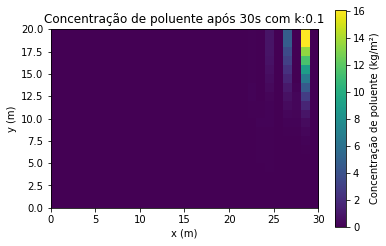

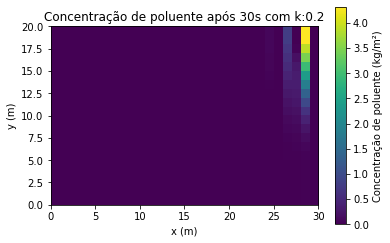

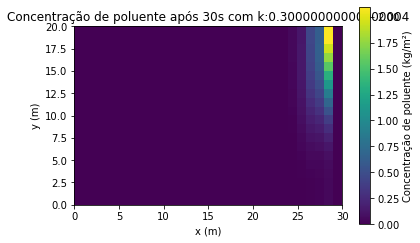

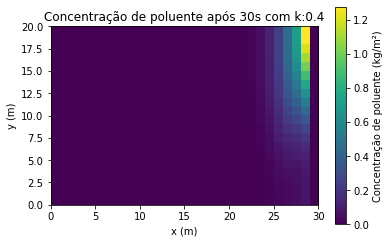

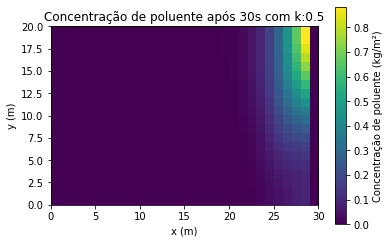

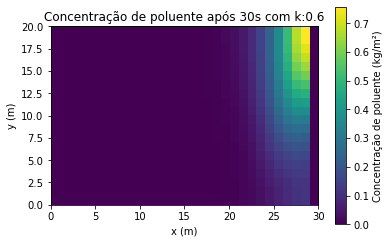

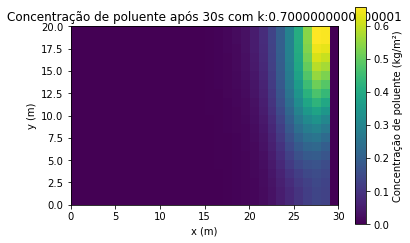

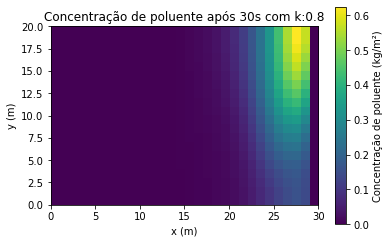

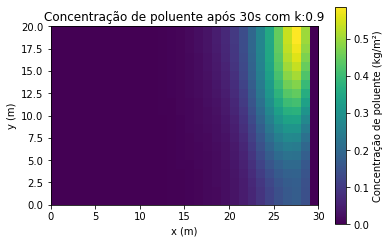

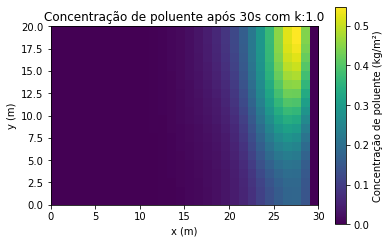

In [79]:
lista_k = np.arange(0.1, 1.1, 0.1)

for k in lista_k:
    concentracao = simulacao(k)

    plt.title("Concentração de poluente após 30s com k:"+ str(k))
    plt.imshow(concentracao, cmap='viridis', extent=[0, Lx, 0, Ly])
    plt.colorbar(label="Concentração de poluente (kg/m²)")
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.show()


## Conclusão Tarefa 4

A apartir dos gráficos podemos concluir que o K influencia diretamente na difusão do poluente, quanto maior o K, maior a difusão. Ou seja, quanto maior o K, mais rápido o poluente se espalha pelo rio, acarretando em uma maior área afetada pelo poluente.

## Tarefa 5:

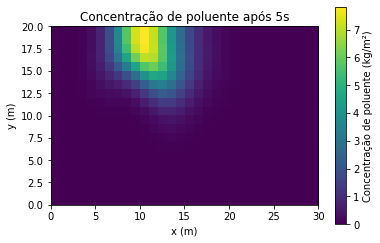

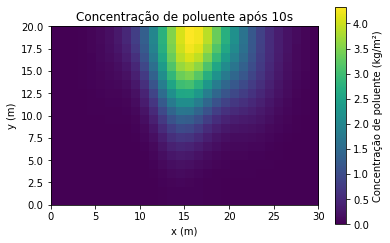

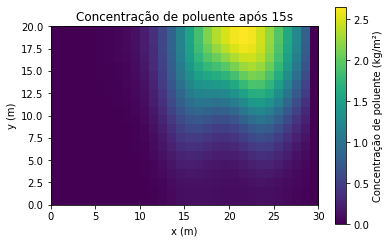

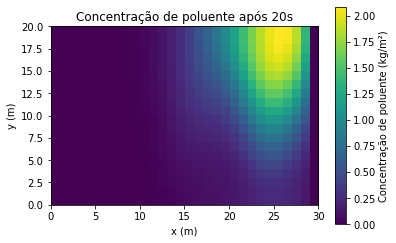

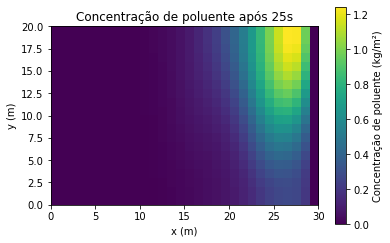

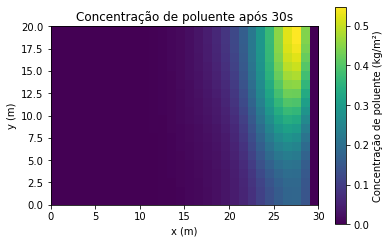

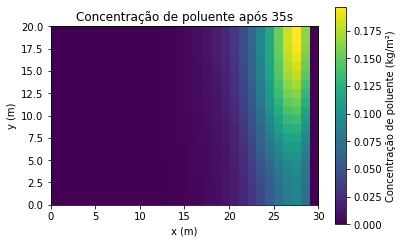

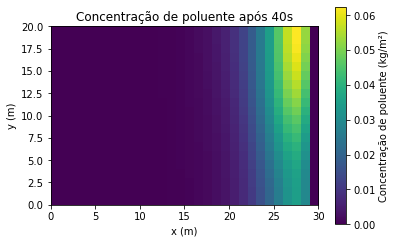

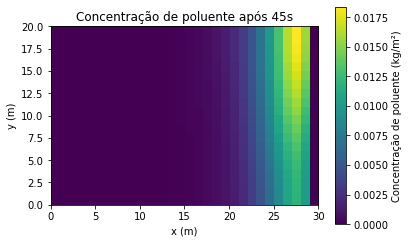

In [80]:
lisa_t_testes = np.arange(5, 50, 5)

K = 1

for t in lisa_t_testes:
    T_final = t
    concentracao = simulacao(K)

    plt.title("Concentração de poluente após " + str(t) +"s")
    plt.imshow(concentracao, cmap='viridis', extent=[0, Lx, 0, Ly])
    plt.colorbar(label="Concentração de poluente (kg/m²)")
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.show()


Ao analisar todos os gráficos, podemos concluir que o poluente se espalha mais rápido no sentido da correnteza do rio, ou seja, no sentido positivo do eixo X. Fazendo com que o primeiro lado que o poluente encosta ser o lado direito do rio.

## Teste de Validação

In [81]:
K = 1
delta_t = 0.05
delta_s = 0.5
alpha = 1
Lx = 30
Ly = 30
T_despejo = 2
T_final = 5
a = b = 15
Q_ponto = 80

def validacao(K):
    x = int(Lx/delta_s)
    y = int(Ly/delta_s)

    #Informações do ponto de solta
    a_idx = int(a/delta_s)
    b_idx = int(b/delta_s)

    C = np.zeros((y, x))
    tt = int(T_final/delta_t)

    qC_ponto = Q_ponto/(delta_s**2)

    var = False
    for t in range(tt):
        C2 = C.copy()

        if t <= T_despejo/delta_t:
            C[b_idx][a_idx] += qC_ponto * delta_t


        for i in range(1, x-1):
            for j in range(1, y-1):
                u = 1
                v = 0

                termo1 = u*(C[j][i+1] - C[j][i-1])/(2*delta_s)
                termo2 = v*(C[j+1][i] - C[j-1][i])/(2*delta_s)
                termo3 = K*((C[j][i-1] - 2*C[j][i] + C[j][i+1])/(delta_s**2))
                termo4 = K*((C[j-1][i] - 2*C[j][i] + C[j+1][i])/(delta_s**2))

                C2[j][i] = C[j][i] + delta_t*(-termo1 - termo2 + termo3 + termo4)

                if C2[j][i] < 0:
                    C2[j][i] = 0

        C2[0][:] = C2[1][:]
        C2[-1][:] = C2[-2][:]
        C2[:][0] = C2[:][1]
        C2[:][-1] = C2[:][-2]

        C = C2.copy()
    
    return C

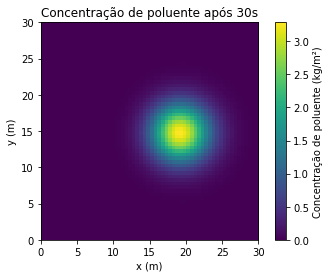

0.6221791920533393


In [82]:
concentracao = validacao(K)

plt.title("Concentração de poluente após 30s")
plt.imshow(concentracao, cmap='viridis', extent=[0, Lx, 0, Ly])
plt.colorbar(label="Concentração de poluente (kg/m²)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()
#printe a concentração na posição C(20, 20)
print(concentracao[40][40])